# Схема математической статистики

- Любая выборочная характеристика будет случайной величиной

In [1]:
import pandas as pd
import itertools
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
# функция которая, рассчитывает показатели из лекции
def estimate_mean():

    # Пусть дан датафрейм
    data = {'Name': ['Маша', 'Паша', 'Саша', 'Даша'],
            'Age':[150, 160, 180, 190]}
    df = pd.DataFrame(data)
    print(' Дан датафрейм')
    display(df)
    
    # среднее генеральной совокупности μ = настоящее среднее
    μ   = df.Age.mean()
    print(f'Среднее генеральной совокупности μ = {μ}')

    print('Будем производить оценку среднего, выбирая по 2 элемента из выборки')
    # если выбрать все возмодные парыы, то такая оценка будет называться пермутационной
    val = df.Name
    com_set = itertools.combinations(val, 2 )
    # в estimate_mean хранятся различные оценки μ с шапкой: 
    # получается что оценка среднего - это случайная величина 
    estimate_mean = [df.query('Name in @i').Age.mean() for i in [i for i in  com_set]]
    print(f'Возможные оценки среднего: {estimate_mean}')
    print(f'Пермутационная оценка среднего равна {np.mean(estimate_mean)}')


    print('Гистограмма распредления оценок среднего выглядит следующим образом')
    pd.Series(estimate_mean).hist()


 Дан датафрейм


,Name,Age
0,Маша,150
1,Паша,160
2,Саша,180
3,Даша,190


Среднее генеральной совокупности μ = 170.0
Будем производить оценку среднего, выбирая по 2 элемента из выборки
Возможные оценки среднего: [155.0, 165.0, 170.0, 170.0, 175.0, 185.0]
Пермутационная оценка среднего равна 170.0
Гистограмма распредления оценок среднего выглядит следующим образом


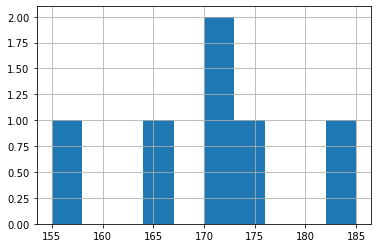

In [3]:
# разбор первого примера 
estimate_mean()

**Любое среднее можно апроксимировать нормальным распредлением  (ЦПТ), для того чтобы  поставить засчеки, внутри которых окажется основаная вероятносная масса и рассуждать о том, насколько точную оценку мы получили**

Соглано ЦПТ, $ \hat{\mu}$ равно среднему значению, рассчитанному по выборке объема n ассимптотическинормально распредлено $ \hat{\mu}= \overline{X}   \sim N (\mu, \frac{\sigma^2}{n}) $ 

Правило трех сигм говорит, что 
$$P(  {\mu}- 3 * \frac{\hat{\sigma}}{\sqrt{n}} \leq  \overline{X}  \leq  \ {\mu}+ 3 * \frac{\hat{\sigma}}{\sqrt{n}}) = 0.997$$
Такой интервал называется предиктивным интервалом. Если переписать неравенсво относительно сигма, то будет получен доверительный интервал:
$$P(\overline{X} - 3 * \frac{\hat{\sigma}}{\sqrt{n}} \leq  {\mu} \leq  \overline{X} + 3 * \frac{\hat{\sigma}}{\sqrt{n}})= 0.997$$

Таким образом, зная оценку среднего $\overline{x}$ и рассчитав $\hat{\sigma}$ можно получить диапазон внутри которого лежит истинное значение среднего генеральной совокупности с вероятностью 99.7%

Так же возможно использовать другую засечку и получить 95% доверительный интервал
$$P(\overline{X} - 1.96 * \frac{\hat{\sigma}}{\sqrt{n}} \leq  {\mu} \leq  \overline{X} + 1.96 * \frac{\hat{\sigma}}{\sqrt{n}})= 0.95$$


Несмещенна оценка срднеквадратического отклонения, рассчитанная по подвыборке: $$\hat{\sigma} = \sqrt{\frac{1}{n-1} * \Sigma(x_i - \overline{x})^2}$$

In [4]:
def est_mu(n:int, hat_sigma: float, overline_x: float, p:float):
    '''
    Функция, которая рассчитывает доверительный интервал для среднего значения на основании ЦТП

    Параметры
    - n - количесво элементов в выборке
    - overline_x  - значение параметра mu, которое было получено на выборке 
    - hat_sigma - значение среднеквадратического отклонения, которое было получено на выборке 
    - p - доверительный интервал
        Если указан 95% доверительный интервал, что истинное значение оцениваемого парметра будет лежать c вероятностью 95% в указанном интервале
        then coef = 1.96
    '''
    alpha = (1-p)/2
    coef = stats.norm().isf(alpha)
    left = round(overline_x - coef * hat_sigma / np.sqrt(n), 4)
    right = round(overline_x + coef * hat_sigma / np.sqrt(n), 4)

    print(f'Значение вероятности: {p * 100}%')
    print(f'Значение коэффициента: {coef:.2f}')
    print(f'Вероятность того, что значение принадлежит интервалу  {left, right} равна {p * 100}%')

In [5]:
est_mu(n = 2, hat_sigma = 28.2, overline_x = 170 , p = 0.997)

Значение вероятности: 99.7%
Значение коэффициента: 2.97
Вероятность того, что значение принадлежит интервалу  (110.8221, 229.1779) равна 99.7%


Если доверительный интервал получается широким - это означает, что кол-во наблюдений мало, для точной оценки мреднего в генеральной совокупности

In [6]:
def z_stats(true_mu:float, overline_x:float, hat_sigma:float, n:int, p:float):
    '''
    Функция, которая проверяет гипотезу о том, что true_mu принадлежит доверительному интервалу построенному по hat_x и hat_sigma

    Параметры
    - true_mu - истинное значение параметра mu в генеральной совокупности (H0 - гипотеза которую мы проверяем)
    - overline_x  - значение параметра mu, которое было получено на выборке 
    - hat_sigma - значение среднеквадратического отклонения, которое было получено на выборке 
    - n - количесво элементов в выборке
    - p - доверительный интервал
        Если указан 95% доверительный интервал, что истинное значение оцениваемого парметра будет лежать c вероятностью 95% в указанном интервале
        then coef = 1.96
    '''
    
    alpha = (1-p)/2
    # стандартная ошибка - стандартное отклонение выборочного распределения средних
    se = hat_sigma / np.sqrt(n)
    # z - оценка
    z_stat = (overline_x - true_mu) / se
    # коэффициент при множителе sigma^2/n
    coef = round(stats.norm().isf(alpha), 4)
    print(f'z-статистика =  {z_stat:.2f}')
    print(f'{p * 100} % доверительный интервал: {[-coef, coef]}')

    if np.abs(z_stat) > np.abs(coef):
        print('z-статистика не принадлежит интервалу, то есть нулевая гипотеза неверна')
    else:
        print('z-статистика принадлежит интервалу, то есть верная нулевая гипотеза')

In [7]:
z_stats( true_mu = 200, overline_x = 155, hat_sigma = 28.2, n = 2, p = 0.95)

z-статистика =  -2.26
95.0 % доверительный интервал: [-1.96, 1.96]
z-статистика не принадлежит интервалу, то есть нулевая гипотеза неверна


**Выводы**:
- центрирование и нормирование дает возможность говорить про асимптотическое распределение для N(0, 1)
- чем больше выборка, тем уже получается доверительный интервал
- чем больше дисперсия, тем шире получается доверительный интервал
- ширина доверительного интервала не зависит от того, какой оказалась оценка среднего
- мы ошибёмся с вероятностью 1%, так как наш доверительный интервал будет накрывать истинное значение с вероятностью 99%
- Если мы хотим в ходе тестирования получать не такие размытые результаты,
нам нужно собрать больше наблюдений, тогда доверительные интервалы станут уже, мы
сможем улавливать более мелкие изменения, и наши выводы будут точнее.

# Метод моментов

iid - Independent and identically distributed random variables : **независимость и какой-то вид распределения**

- Закон больших чисел говорит нам, что среднее выборочное $\hat{X}$ является хорошей оценкой для математического (**то есть на практике это значит, что выборочное среднее сходится по вероятности к своему мат ожиданию)**
ожидания
- ЦПТ говорит о том, что среднее можно апроксимировать нормальным распредлением  

момент $E(X_{i}^k)$ зависит от неизвестного параметра  $\theta$: $$E(X_{i}^k) = f(\theta)$$
оценкой момента называется случаная велечина $\hat{\theta_{MM}} = f^{-1}(X_{i}^k)$
то есть оцуенка получается решением уравнения $$E(X_{i}^k) \approx \frac{\Sigma x_{i}^k}{n}$$
**математическое ожидание k-ой степени случайно величины примерно совпадает со средним порядка k**


Чаще всего используею момент первого порядка, но если он равен 0, то используют моменты более высоких порядков

Нужно оценить 2 параметра (дисперсию и мат ожиданию), тто сразу используют 2 момента
\begin{cases}
   E(X_{i} ) \approx   \overline{x}\\
   E(X_{i}^2) \approx   \overline{x^2} 
 \end{cases}
 
 \begin{cases}
   \mu  =   \overline{x}\\
    \mu^2 + \sigma^2   = \overline{x^2} 
 \end{cases}

  \begin{cases}
   \mu  =   \overline{x}\\
    \sigma^2   = \overline{x^2} -\overline{x}^2
 \end{cases}

- Понять распределение оценки  $\hat \theta$  помогают разные теоремы, нужную теорему мы выбираем в зависимости от предпосылок, которые мы наложили на выборку
- Метод моментов помогает найти оценку $ \hat \theta $
- Мы хотим понять распределение оценки  $\hat \theta$  , чтобы построить для неё доверительный интервал и понять насколько она точная  
- Если мы хотим привлечь ЦПТ, чтобы понять распределение оценки, выборка должна собираться независимо, в ней не должно быть аномалий

# Мощь средних

Закон больших чисел (ЗБЧ) в теории вероятностей — принцип, описывающий результат выполнения одного и того же эксперимента много раз. Согласно закону, **среднее значение конечной выборки** из фиксированного распределения **близко к математическому ожиданию этого распределения**.

Центра́льные преде́льные теоре́мы (ЦПТ) — cумма большого числа как угодно распределенных независимых случайных величин **распределена асимптотически нормально**, если только слагаемые вносят равномерно малый вклад в сумму.

- **Закон больших чисел дает нам возможность с помощью метода моментов построить оценку $\hat{\theta_{MM}}$**
- **ЦТП дает нам информацию о распределении $\hat{\theta_{MM}}$, мы можем построить доверительный интервал**

Чтобы построить доверительный интервал 
$$P(\hat{\theta_{L}} \leq \theta \leq \hat{\theta_{R}}) = 1 -\alpha = 0.95$$

0.95 или  0.99 - это уровень надежности (принимаем, что истинное значение $\theta$ может вылететь с вероятностью 5% или 1%)

$\alpha$  = уровень значимости = какую ошибку мы можем совершить. Мы готовы соглашаться на ошибку, так как работаем с маленькой конкретной выборкой, а не с генеральной совокупностью



Примеры инетритации уровня значимости 5% (уровня надежности 95%): 
- если мы 100 раз попытаемся сесть на поезд на уровне значимости 5%, в среднем мы опаздаем 5 раз
- при бесконечном повторении эксперимента доверительный интервал будет накрывать истинное значение параметра $\mu$ 95% случаев

Мы можем зафиксирвоать уровень надежности на уровне $1-\alpha$ и построить доверительный интервал
$$P(-z_{1-\frac{\alpha}{2}} 
 \leq 
 \frac{\overline{x} - \mu}{\sqrt{\hat{\sigma}^2/n}} 
 \leq 
 z_{1-\frac{\alpha}{2}}) = 1 - \alpha$$

$$P(\overline{x} -z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{\sigma}^2}{n}}
\leq
   \mu
\leq 
   \overline{x}+z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{\sigma}^2}{n}}) = 1 - \alpha$$


Длина доверительного интервала
$$\Delta = 2 * z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{\sigma}^2}{n}}$$

- если  $n ↑ \Rightarrow \Delta ↓$ 
- если  $\sigma ↑ \Rightarrow \Delta ↑ $ то есть шум негативно сказывается на длине интервала
- если  $1-\alpha ↑ \Rightarrow \Delta ↑$ 

Резюме:
 - ЦПТ позволяет строить асимптотические доверительные интервалы для среднего 
 - Доверительный интервал позволяет описать степень неуверенности в полученной оценке
 - Такой доверительный интервал верен при большом кол-ве наблюдений, если в выборке нет анамалий, данные были собраны независимо

**Построение доверительного интервала для разности средних**
 - Даны две независимые случаные велечины 
   $$\overline{x} \sim N(\mu_1,\frac{\sigma_1^2}{n}) $$
   $$\overline{y} \sim N(\mu_1,\frac{\sigma_2^2}{n}) $$
 - Разность нормальных случайных велечин - нормальная случаная величина
 $$E(\overline{x} - \overline{y}) =E(\overline{x}) - E(\overline{y}) = \mu_1 - \mu_2$$
  $$Var(\overline{x} - \overline{y}) =Var(\overline{x}) + Var(\overline{y}) = \frac{\sigma_1^2}{n} + \frac{\sigma_2^2}{n}$$ 
  
 - Тогда предельное распредление $$\overline{x} -  \overline{y} \sim N(\mu_1 - \mu_2, \frac{\hat{\sigma_1}^2}{n} + \frac{\hat{\sigma_2}^2}{n}) $$

Асимптотический доверительный интервал для $\overline{x} -  \overline{y}$:

 $$(\overline{x} -  \overline{y}) \pm  z_{1-\frac{\alpha}{2}} * \sqrt{\frac{\hat{\sigma_1}^2}{n} + \frac{\hat{\sigma_2}^2}{n}}$$

используется квантиль $1-\frac{\alpha}{2} $

In [8]:
def ci_for_diff(overline_x,overline_y, hat_x, hat_y, n, alpha ):
    '''
    Функция, которая строит доверительный интервал для разноcти средних

    Параметры 
    - overline_x, overline_y - оценка двух параметров на основании выборочных данных
    - hat_x, hat_y - оценка среднеквадратичного отклонения двух параметров на основании выборочных данных 
    - n - оъем выборки
    - alpha - уровень значимости 
    '''
    mu = overline_x - overline_y
    se = np.sqrt(hat_x**2 / n + hat_y**2 / n )
    coef = round(stats.norm().isf(alpha/2), 4)
    left, right = mu - coef*se, mu + coef*se
    
    print(f'В интервал [{left:.3f}, {right:.3f}] приходится 95% вероятностной массы')
    if left <= 0 <=right:
        print(' Ноль входит в интервал, то разницы между двумя случайными величиными нет')
    else:
        print(' Ноль не входит в интервал, имеется разница между двумя случайными величиными')

In [9]:
ci_for_diff(overline_x = 5, overline_y = 4, 
            hat_x = np.sqrt(5), hat_y = np.sqrt(4),
            n = 100, alpha = .05 )

В интервал [0.412, 1.588] приходится 95% вероятностной массы
 Ноль не входит в интервал, имеется разница между двумя случайными величиными


**Асимптотические доверительные интервалы для долей**
 - Когда мы говорим о долях - это значит, что мы говорим о нулях и еденицах (распредление Бернулли):
$$X_ i = 0: P(X_ i = 0)=1-p$$
$$X_ i = 1: P(X_ i = 1)=p$$

Так как , все наши наблюдения принимают значения 1 и 0, выборка никак не может быть нормальной, но средние посчитанные по ней будут нормальными по ЦПТ

Вероятность $\hat{p} = \frac{X_1+X_2+...+X_n}{n} = \overline{x}$
Мат ожидание для доли: 
$$E(\hat{p}) = E(\frac{X_1+X_2+...+X_n}{n}) = \frac{1}{n}*n*E(X_1)=0*(1-p)+1*p=p$$
так как выборка производиласть из одного и того же распределения, то мат ожидания $E(X_1) = E(X_2)$

Дисперсия находится по аналогии:
$$Var(\hat{p}) = Var(\frac{X_1+X_2+...+X_n}{n}) = \frac{1}{n^2}*n*Var(X_1)=\frac{p(1-p)}{n}$$ 
где $Var(X_1) = E(X_1^2) - E(X_1)^2$

Следовательно, $$\hat{p} = \overline{x} \overset{asy}{\sim} N(p, \frac{p(1-p)}{n})$$
$$\hat{p_1} - \hat{p_2}  \overset{asy}{\sim} N(p_{1} - p_{2}, \frac{\hat{p}(1-\hat{p})}{n_1} + \frac{\hat{p}(1-\hat{p})}{n_2})$$

Доверительный интервал для одной доли
 $$\hat{p} \pm z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$
Доверительный интервал для разности долей
$$\hat{p_1} - \hat{p_2} \pm z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}} $$

Доверительный интервал для доли хорош тем, что мы заранее можем оценить сколько наблюденйи нам нужно, чтобы получить доверительный интервал конкретной ширины:
$$\Delta = 2 * z_{1-\frac{\alpha}{2}} * \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

 Выражая из данного уравнения $n$ получаем:
 $$ n = \frac{4 * z_{1-\frac{\alpha}{2}}^2 *\hat{p}(1-\hat{p}) }{\Delta^2}$$
 так как $max[p*(1-p)] = 0.25$, то перепишем формулу: 
 $$ n  \leq  \frac{z_{1-\frac{\alpha}{2}}^2 }{\Delta^2}$$

- Оценка метода моментов - не требует знания точного закона распределения, достаточно знания теоретических моментов
- Чем больше выборка, тем уже получается доверительный интервал
- Длина доверительного интервала не зависит от того, какой оказалась оценка среднего
- Если мы хотим привлечь ЦПТ, чтобы понять распределение оценки, выборка должна собираться независимо, в ней не должно быть аномалий
- Чем больше дисперсия, тем шире получается доверительный интервал

In [27]:
def length_ci_for_ratio(hat_p, n, p):
    '''
    Функция, которая возвращет длину доверительного инетрвала для доли 

    Аргументы:
    - hat_p - оценка доли 
    - p -  уровень надежности
    - n - количество элементов 
    '''
    alpha = (1-p)/2
    coef = stats.norm().isf(alpha)
    return round(2 * coef * np.sqrt(hat_p * (1 - hat_p) / n), 2)
length_ci_for_ratio(hat_p = 0.6 , p= 0.95, n =100)

0.19

In [30]:
def length_ci_for_diff_ratio(hat_p1, hat_p2, n1, n2, p ):
    '''
    Функция, которая возвращет доверительного интервала для разницы долей

    Аргументы:
    - hat_p1, hat_p2 - оценка долей
    - p -  уровень надежности
    - n1, n2 - количество элементов 
    '''
    # внутренняя функцияя для расчета дисперсии
    def var(hat_p, n):
        return hat_p * (1 - hat_p) / n
    
    alpha = (1-p)/2
    coef = stats.norm().isf(alpha)
    
    diff = hat_p1 - hat_p2
    multiplier =  np.sqrt(var (hat_p1 , n1) + var (hat_p2 , n2))
    left, right = diff - coef * multiplier , diff +  coef * multiplier 
    
    print(f'[{left:.2f},{right:.2f}]')
    print(f'Длина интервала {np.abs(left - right):.2f}')

length_ci_for_diff_ratio(hat_p1 = 250/400, hat_p2 = 60/100, n1 = 400, n2 = 100, p = .95)

[-0.08,0.13]
Длина интервала 0.21


In [61]:
def estimate_number_of_sample(delta, p = .95, kind = 'bruteforse', hat_p = None):
    '''
    Функция, которая возвращает количество наблюдений в воборке для выполнения заявленной точности
    
    Аргументы:
    - delta - длина доверительного инетрвала
    - p - уровень надежности
    - kind  - если установлен флаг 'bruteforse', то расчет ведется для значения hat_p = 0.25, что в свою очередь немного меняет формулу расчетов 
    - hat_p - оценка доли
    '''
    

    alpha = (1 - p) / 2
    coef = stats.norm().isf(alpha)
    if kind == 'bruteforse':
        return round(np.power(coef/delta, 2))
    else:
        return round(4 * coef ** 2 * hat_p * (1 - hat_p) /delta**2)

print(estimate_number_of_sample(delta = .1))
print(estimate_number_of_sample(delta = .1, p = .95, kind = 'no_bruteforse', hat_p = 0.7))

384
323
